# Reconocimiento de Aves

## Dependencias

In [3]:
import sys
import os
import tensorflow as tf

print(tf.__version__)

2.8.0


Datos

In [4]:
train_data_path = './birds-dataset/train'
valid_data_path = './birds-dataset/valid'

## Parametros

In [5]:
epochs=30
width, height = 180, 180
batch_size = 32
pasos = int(674/batch_size)
validation_steps = 100
num_classes = 5
lr = 0.0004

## Preparacion de imagenes

In [6]:
training_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

training_set = training_data_generator.flow_from_directory(
    train_data_path,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_set = validation_data_generator.flow_from_directory(
    valid_data_path,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 674 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [7]:
import matplotlib.pyplot as plt

def show_image(filepath, target_size=None) :
  image = tf.keras.preprocessing.image.load_img(filepath, target_size=target_size)
  plt.imshow(image)
  plt.show()

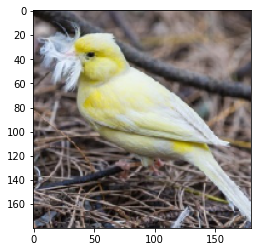

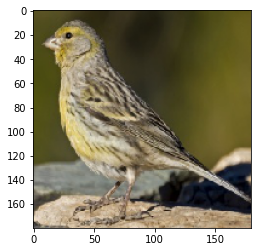

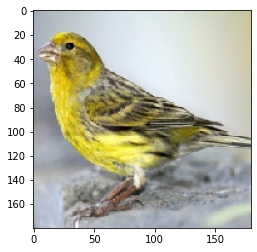

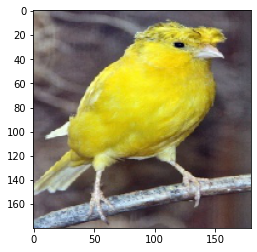

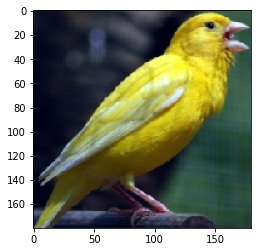

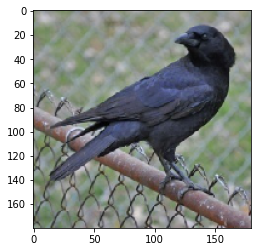

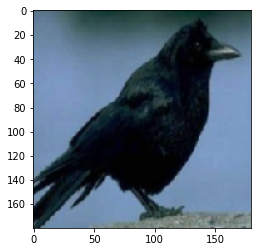

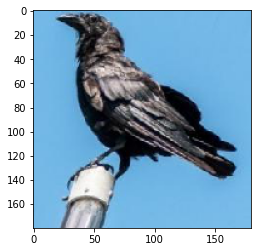

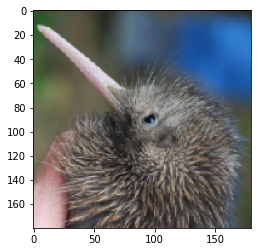

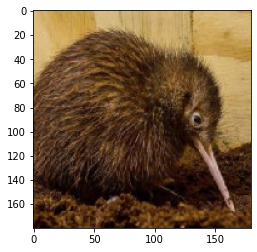

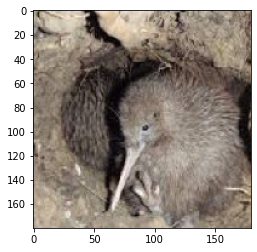

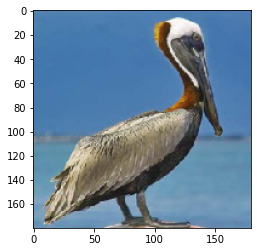

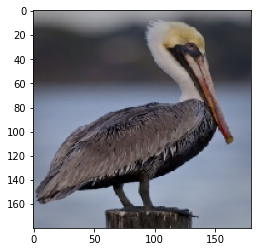

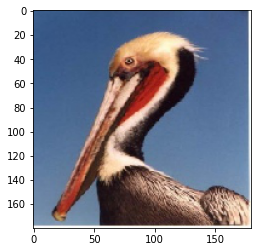

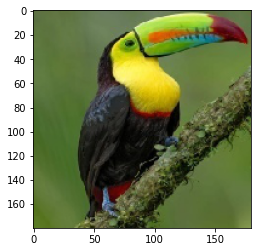

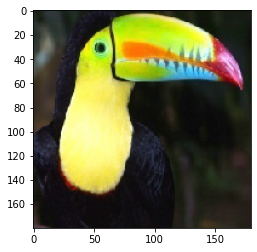

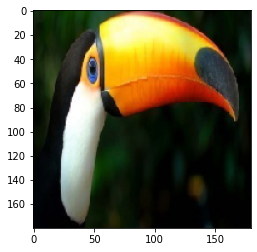

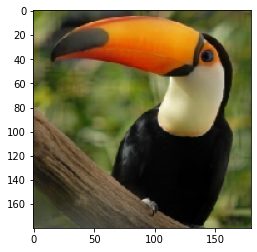

In [8]:
for i in range(len(training_set.filepaths)) :
  if i % 39 == 0:
    show_image(training_set.filepaths[i], (width, height))

## Modelo

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(32, (3, 3), padding ="same", input_shape=(width, height, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Convolution2D(64, (2, 2), padding ="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0         
                                                                 
 dense (Dense)               (None, 256)               3

## Entrenamiento

In [11]:
history = model.fit(
    training_set,
    steps_per_epoch=pasos,
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=validation_steps
)

Epoch 1/30
21/21 [==============================] - 34s 1s/step - loss: 4.2206 - accuracy: 0.3489 - val_loss: 0.7888 - val_accuracy: 0.7200
Epoch 2/30
21/21 [==============================] - 27s 1s/step - loss: 0.9358 - accuracy: 0.6308
Epoch 3/30
21/21 [==============================] - 27s 1s/step - loss: 0.8730 - accuracy: 0.6698
Epoch 4/30
21/21 [==============================] - 28s 1s/step - loss: 0.6450 - accuracy: 0.7827
Epoch 5/30
21/21 [==============================] - 28s 1s/step - loss: 0.5604 - accuracy: 0.7944
Epoch 6/30
21/21 [==============================] - 29s 1s/step - loss: 0.5031 - accuracy: 0.8302

## Metricas

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# print("acc: ", acc)
print("val_acc: ", val_acc)
# print("loss: ", loss)
print("val_loss: ", val_loss)

val_acc:  [0.7200000286102295]
val_loss:  [0.7887641787528992]


## Guardar modelo

In [13]:
from datetime import datetime

target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)

now = datetime.now()
timestamp = ''.join(str(datetime.timestamp(now)).split('.'))

model.save('./models/model-'+ timestamp +'.h5')
model.save_weights('./models/weight-'+ timestamp +'.h5')

## Predecir

In [15]:
import numpy as np

model = './models/model-1649217609185901.h5'
weight_model = './models/weight-1649217609185901.h5'
load_model = tf.keras.models.load_model(model)
load_model.load_weights(weight_model)

In [24]:
def predict(file):
  test_image = tf.keras.preprocessing.image.load_img(file, target_size=(width, height))
  test_image = tf.keras.preprocessing.image.img_to_array(test_image)
  # print(test_image.shape)
  test_image = np.expand_dims(test_image, axis=0)
  # print(test_image.shape)
  prediction = load_model.predict(test_image)
  result = prediction[0]
  index = np.argmax(result)
  if index == 0:
    print("CANARY")
  elif index == 1:
    print("CROW")
  elif index == 2:
    print("KIWI")
  elif index == 3:
    print("PELICAN")
  elif index == 4:
    print("TOUCHAN")
  # return result

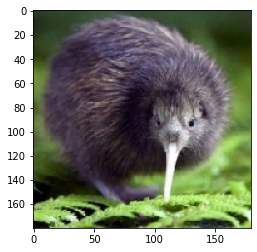

KIWI


In [34]:
image_to_predict = './birds-dataset/test/KIWI/3.jpg'
show_image(image_to_predict, target_size=(width, height))

predict(image_to_predict)